In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
center_info = pd.read_csv(r'C:\Users\Dell\Downloads\Food demand dataset\fulfilment_center_info.csv')
meal_info = pd.read_csv(r'C:\Users\Dell\Downloads\Food demand dataset\meal_info.csv')
train = pd.read_csv(r'C:\Users\Dell\Downloads\Food demand dataset\train.csv')

Checking Unique values

In [3]:
print('center_info.center_type unique_values are : {} \n'.format(center_info['center_type'].unique()))
print('center_info.op_area unique_values are : {} \n'.format(center_info['op_area'].unique()))

center_info.center_type unique_values are : ['TYPE_A' 'TYPE_B' 'TYPE_C'] 

center_info.op_area unique_values are : [3.7 6.7 4.  4.1 3.6 4.4 3.9 2.8 3.8 2.4 2.9 4.5 2.7 3.  3.4 4.6 5.  5.1
 2.  0.9 4.8 5.3 7.  4.2 4.7 1.9 6.3 5.6 3.2 3.5] 



Getting the types of Foods available:

In [4]:
print('mean_info.category unique_values are : {} \n'.format(meal_info['category'].unique()))
print('mean_info.cuisine unique_values are : {} \n'.format(meal_info['cuisine'].unique()))

mean_info.category unique_values are : ['Beverages' 'Extras' 'Soup' 'Other Snacks' 'Salad' 'Rice Bowl' 'Starters'
 'Sandwich' 'Pasta' 'Desert' 'Biryani' 'Pizza' 'Fish' 'Seafood'] 

mean_info.cuisine unique_values are : ['Thai' 'Indian' 'Italian' 'Continental'] 



In [5]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


Checking for null data:

In [6]:
meal_info.isnull().head()

,meal_id,category,cuisine
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


Merging the center and meal info with the train dataset:

In [7]:
data = train.merge(meal_info, on='meal_id')
data = data.merge(center_info, on = 'center_id')
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


Description of the merged Dataset

In [8]:
data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


Checking for Outliers

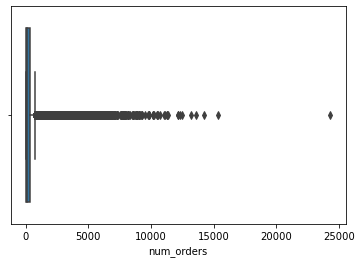

In [9]:
sn.boxplot(x='num_orders', data = data)

Determinig Correlation between the independant variables:

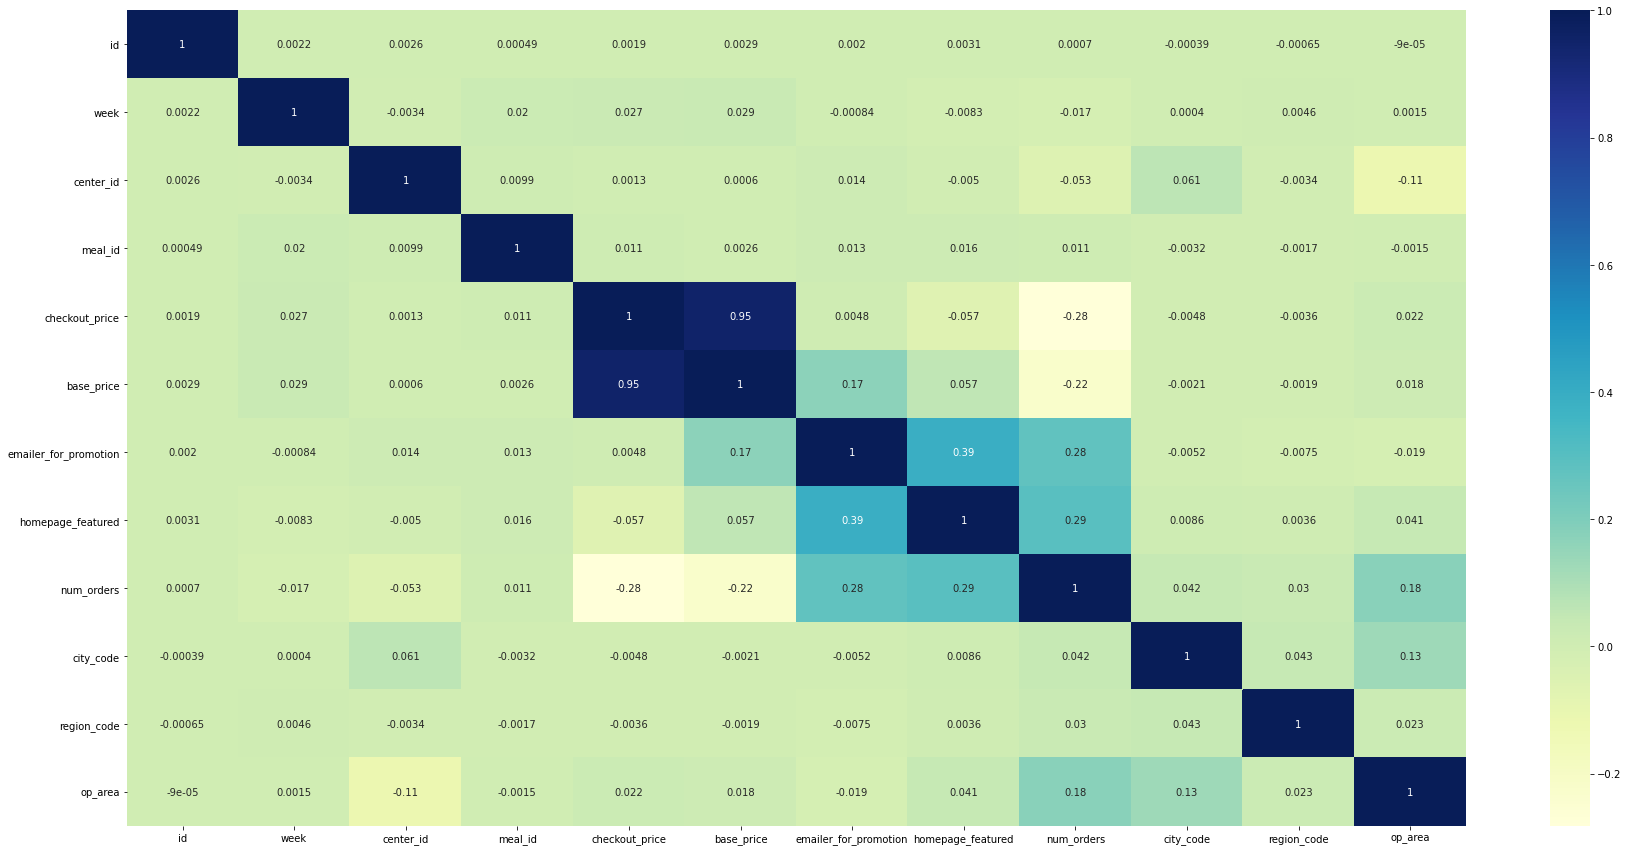

In [10]:
plt.figure(figsize=(30,15))
c= data.corr()
sn.heatmap(c,cmap='YlGnBu',annot=True)

Since Checkout and Bade Price are highly correlated.. and HomePage Featured and Emailer for promotions also seems to be correlated.
Hence Removing the Base Price and Emailer For Promotions feature column..

Also the 'ID' feature does not seems to be an important factor, removing ID too

In [11]:
new_data = data.drop('base_price', axis = 1)

In [12]:
new_data = new_data.drop('id', axis = 1)

In [13]:
new_data = new_data.drop('emailer_for_promotion', axis = 1)

In [14]:
new_data.head()

,week,center_id,meal_id,checkout_price,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1,55,1885,136.83,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,2,55,1885,135.83,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,3,55,1885,132.92,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,4,55,1885,135.86,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,5,55,1885,146.50,0,215,Beverages,Thai,647,56,TYPE_C,2.0


Removing the Outliers from the num_orders column:

In [15]:
outlier_index = new_data[new_data['num_orders']>14000].index

In [16]:
outlier_index

Int64Index([391413, 391414, 391415], dtype='int64')

In [17]:
new_data_1 = new_data.drop(outlier_index)

In [18]:
new_data_1.head()

,week,center_id,meal_id,checkout_price,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1,55,1885,136.83,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,2,55,1885,135.83,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,3,55,1885,132.92,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,4,55,1885,135.86,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,5,55,1885,146.50,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [19]:
new_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456545 entries, 0 to 456547
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   week               456545 non-null  int64  
 1   center_id          456545 non-null  int64  
 2   meal_id            456545 non-null  int64  
 3   checkout_price     456545 non-null  float64
 4   homepage_featured  456545 non-null  int64  
 5   num_orders         456545 non-null  int64  
 6   category           456545 non-null  object 
 7   cuisine            456545 non-null  object 
 8   city_code          456545 non-null  int64  
 9   region_code        456545 non-null  int64  
 10  center_type        456545 non-null  object 
 11  op_area            456545 non-null  float64
dtypes: float64(2), int64(7), object(3)
memory usage: 45.3+ MB


In [20]:
final_train=pd.DataFrame({'week':new_data_1['week'],'center_id':new_data_1['center_id'],'city_code':new_data_1['city_code'],'region_code':new_data_1['region_code'],'op_area':new_data_1['op_area'],'meal_id':new_data_1['meal_id'],'price':new_data_1['checkout_price'],'promotions':new_data_1['homepage_featured'],'orders':new_data_1['num_orders']})
final_train= final_train[['week','center_id','city_code','region_code','op_area','meal_id','price','promotions','orders']]
final_train.head()

,week,center_id,city_code,region_code,op_area,meal_id,price,promotions,orders
0,1,55,647,56,2.0,1885,136.83,0,177
1,2,55,647,56,2.0,1885,135.83,0,323
2,3,55,647,56,2.0,1885,132.92,0,96
3,4,55,647,56,2.0,1885,135.86,0,163
4,5,55,647,56,2.0,1885,146.50,0,215


Relating the weeks and num_oreders: 

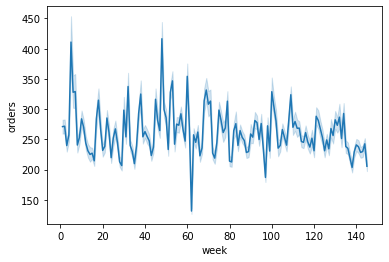

In [21]:
sn.lineplot(final_train['week'],final_train['orders'])

Exporting the obtained dataset into a csv file:

In [22]:
final_train.to_csv('train_data.csv',index=False)